In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import layers

In [2]:
# !pip install scikeras

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# Ensure TensorFlow is using GPU
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Step 1: Load and prepare data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # already 1D, no need to reshape

In [6]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
# X = data.data
# y = data.target

In [8]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 4: Model builder

def build_model(learning_rate=0.001, dropout_rate=0.3,neurons = 64,optimizer_name='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    # model.add(Dense(64, activation='relu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate))
    # model.add(Dense(64, activation='relu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Regression output

    # Choose optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    # optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')  # R² as external metric
    return model

In [11]:
# Step 5: Wrap and setup GridSearchCV
regressor = KerasRegressor(model=build_model, verbose=1)

In [12]:
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.1, 0.2],
    'model__neurons': [32],
    'batch_size': [32],
    'epochs': [10],
    'model__optimizer_name': ['adam', 'rmsprop']
}

In [13]:
grid = GridSearchCV(estimator=regressor,
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-1,
                    scoring='r2',
                    verbose=1)

In [27]:
# Step 6: Fit model
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pavithira\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\Pavithira\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pavithira\ana

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7012
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4355
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4380
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4062
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4088
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3922
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3964
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3691
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3905
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3726


In [28]:
# Step 7: Evaluate
print(" Best Parameters Found:")
print(grid_result.best_params_)

 Best Parameters Found:
{'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.01, 'model__neurons': 32, 'model__optimizer_name': 'adam'}


In [31]:
best_model = grid_result.best_estimator_

In [33]:
best_params = grid_result.best_params_

In [35]:
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
print(f"\nFinal Test MSE: {mse:.4f}")
print(f"Final Test R² Score: {r2:.4f}")


Final Test MSE: 0.3800
Final Test R² Score: 0.7100


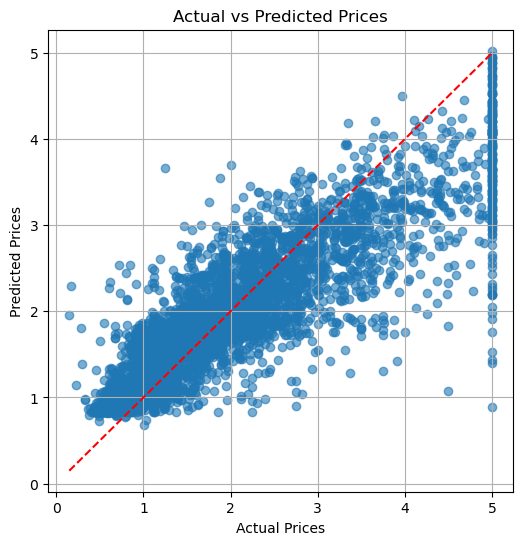

In [39]:
# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

In [41]:
# Compare predictions with actual values
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]:.2f}")

Predicted: 0.83, Actual: 0.48
Predicted: 1.32, Actual: 0.46
Predicted: 4.05, Actual: 5.00
Predicted: 2.06, Actual: 2.19
Predicted: 2.87, Actual: 2.78


In [43]:
final_model = build_model(
    learning_rate=best_params['model__learning_rate'],
    dropout_rate=best_params['model__dropout_rate'],
    neurons=best_params['model__neurons'],
    optimizer_name=best_params['model__optimizer_name']
)

C:\Users\Pavithira\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
history = final_model.fit(
    X_train_scaled, y_train,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0740 - val_loss: 0.5587
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4606 - val_loss: 0.4485
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4113 - val_loss: 0.4750
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4259 - val_loss: 0.4596
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3820 - val_loss: 0.3987
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3626 - val_loss: 0.4286
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3803 - val_loss: 0.5190
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3736 - val_loss: 0.3660
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3738 - val_loss: 0.3960
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3773 - val_loss: 0.4008


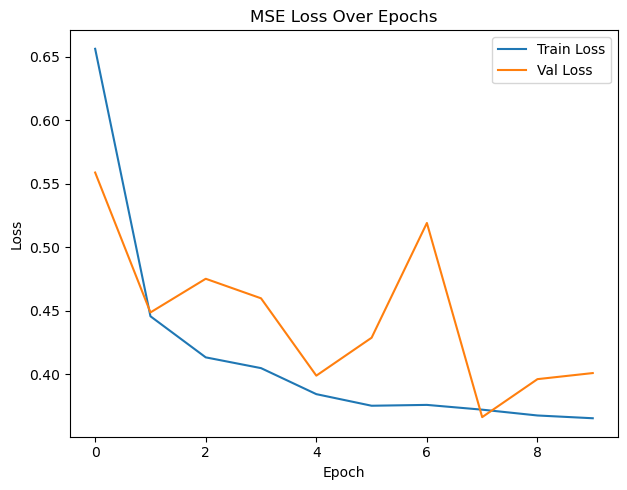

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()